In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data Understanding and Preparation: [5 Marks]

#### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [3]:
df1= pd.read_csv('Data1.csv')
df2= pd.read_csv('Data2.csv')
df1.head(3)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1


In [95]:
df2.head(3)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN


#### B. Print shape and Column Names and DataTypes of both the Dataframes.

In [4]:
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (5000, 8)
Shape of df2: (5000, 7)


In [97]:
df1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [98]:
df2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [5]:
bank_data= pd.merge(df1, df2, on='ID', how='inner')
bank_data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


#### Change Datatype of below features to ‘Object’ [1 Marks]
#### ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [7]:
c= ['CreditCard', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore'] #List the columns that are need to be convert to 'object' type
for i in c:
    bank_data[i]=bank_data[i].astype('object')
bank_data.head(2)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN


##### from the 'bank_data', 'ID' and 'ZipCode' columns are highly irrelevant to predict the 'LoanOnCard'. So, here I am dropping both of that columns.

In [16]:
bank_data= bank_data.drop(['ID', 'ZipCode'], axis=1)
bank_data.head(2)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,NaN
1,45,19,34,3,1.5,1,0,1,0,0,0,NaN


In [17]:
# checking the 'object'data types to verify the confirmation.
object_dt=bank_data.select_dtypes(include='object')
object_dt.dtypes

HiddenScore            object
Level                  object
Security               object
FixedDepositAccount    object
CreditCard             object
dtype: object

### 2. Data Exploration and Analysis: 
#### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. 

In [63]:
bank_data.head(2)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0.0
1,45,19,34,3,1.5,1,0,1,0,0,0,0.0


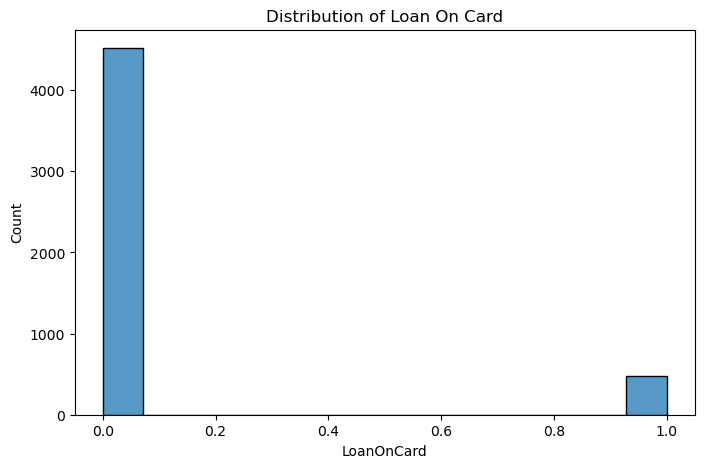

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(data=bank_data, x='LoanOnCard')
plt.title('Distribution of Loan On Card')
plt.show()

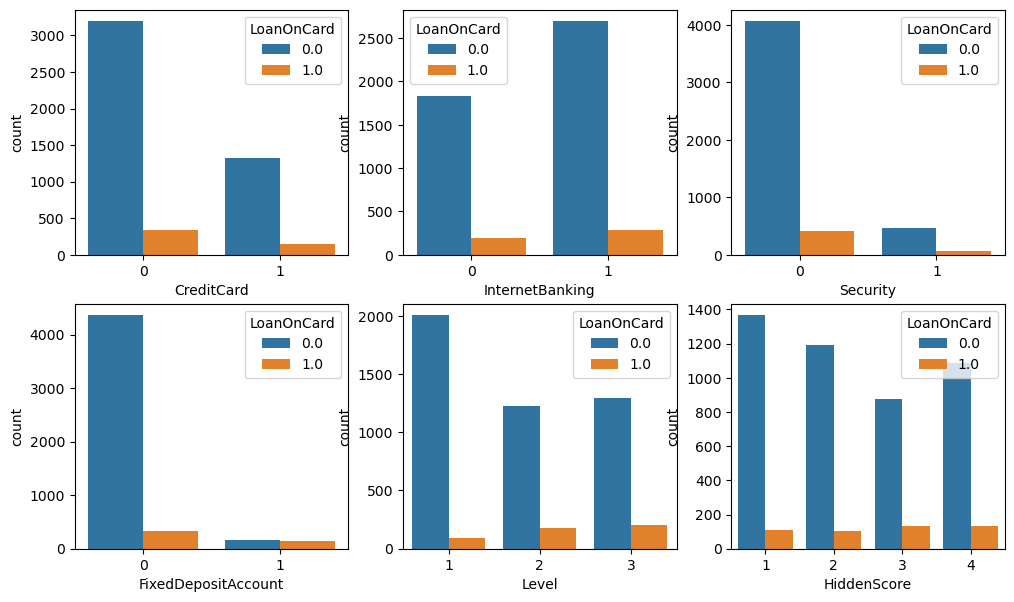

In [123]:
# for the better insights we can consider the columns which are giving good visualisation from the above
plt.figure(figsize=(12,7))
plt.subplot(2,3,1)
cp1=sns.countplot(data= bank_data,x='CreditCard',hue="LoanOnCard")
plt.subplot(2,3,2)
cp2=sns.countplot(data= bank_data,x='InternetBanking',hue="LoanOnCard")
plt.subplot(2,3,3)
cp3=sns.countplot(data= bank_data,x='Security',hue="LoanOnCard")
plt.subplot(2,3,4)
cp4=sns.countplot(data= bank_data,x='FixedDepositAccount',hue="LoanOnCard")
plt.subplot(2,3,5)
cp5=sns.countplot(data= bank_data,x='Level',hue="LoanOnCard")
plt.subplot(2,3,6)
cp6=sns.countplot(data= bank_data,x='HiddenScore',hue="LoanOnCard")

### From the above count plots:
    => We can target the people, who don't have credit card compare to the people with Credit card.
    => People using Internet Banking, has the high chance of taking Loan on card.
    => People without Security deposit has the high chance for availing Loan on card
    => Even though people with Fixed deposit account is less, they have equal ratio of Loan on card than the ratio of people who       don't have Fixed deposit account.
    => Level 3 people has the high number of Loan on card
    

#### B. Check the percentage of missing values and impute if required.

In [18]:
bank_data.isnull().sum()
null_percent= bank_data.isnull().mean()*100
null_percent


Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

#### only 'LoanOnCard' column has 0.4% of Null values.

In [108]:
print(bank_data.LoanOnCard.shape)
print(bank_data.LoanOnCard.value_counts())

(5000,)
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


In [109]:
print(bank_data.LoanOnCard.unique())
# LoanOnCard contains 0,1 and Null values.

[0. 1.]


In [12]:
bank_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking          int64
CreditCard              object
LoanOnCard             float64
dtype: object

In [48]:
bank_data["LoanOnCard"].fillna(bank_data["LoanOnCard"].mode().iloc[0], inplace=True)

#fill the null values in the 'LoanOnCard' column with the most frequency values.

In [49]:
bank_data.isnull().sum()
#now the null values are fixed

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

#### Check for unexpected values in each categorical variable and impute with best suitable value.

In [19]:
#select the column with the categorical values
ca= bank_data.select_dtypes('object').columns
ca

Index(['HiddenScore', 'Level', 'Security', 'FixedDepositAccount',
       'CreditCard'],
      dtype='object')

In [14]:
for i in ca:
    values= bank_data[i].unique()
    value_counts= bank_data[i].value_counts()
    print('Values for',i,":", values)
    print('Value Counts for:',i,value_counts)
    

Values for HiddenScore : [4 3 1 2]
Value Counts for: HiddenScore 1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64
Values for Level : [1 2 3]
Value Counts for: Level 1    2096
3    1501
2    1403
Name: Level, dtype: int64
Values for Security : [1 0]
Value Counts for: Security 0    4478
1     522
Name: Security, dtype: int64
Values for FixedDepositAccount : [0 1]
Value Counts for: FixedDepositAccount 0    4698
1     302
Name: FixedDepositAccount, dtype: int64
Values for CreditCard : [0 1]
Value Counts for: CreditCard 0    3530
1    1470
Name: CreditCard, dtype: int64


In [15]:
#statistical description of the data
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
InternetBanking,5000.0,0.596800,0.490589,0.0,0.00,1.0,1.00,1.0
LoanOnCard,4980.0,0.096386,0.295149,0.0,0.00,0.0,0.00,1.0


In [74]:
bank_data.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

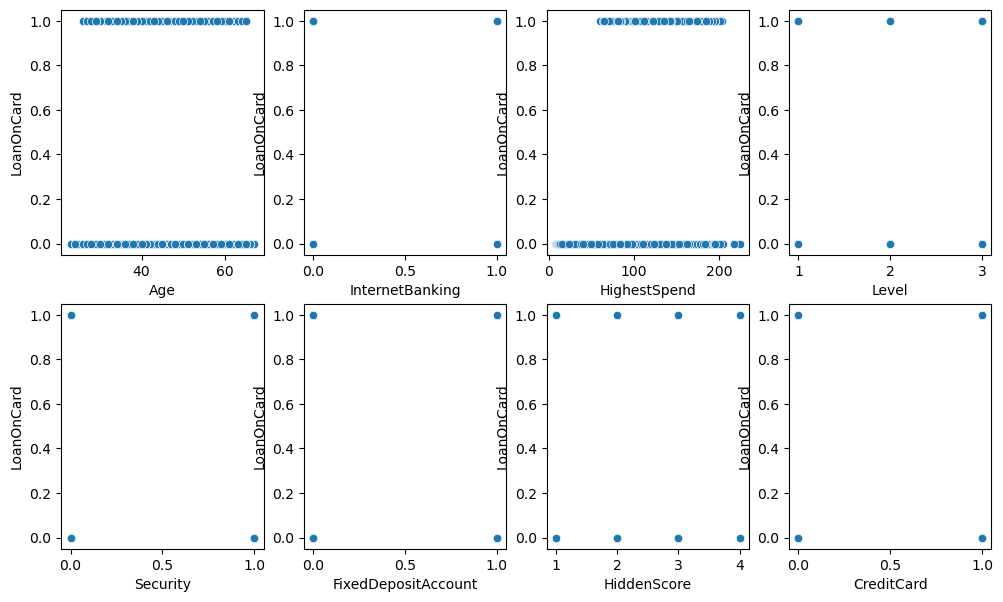

In [92]:
plt.figure(figsize=(12,7))
plt.subplot(2,4,1)
pl1= sns.scatterplot(bank_data, x='Age', y='LoanOnCard')
plt.subplot(2,4,2)
pl2= sns.scatterplot(bank_data, x='InternetBanking', y='LoanOnCard')
plt.subplot(2,4,3)
pl3= sns.scatterplot(bank_data, x='HighestSpend', y='LoanOnCard')
plt.subplot(2,4,4)
pl4= sns.scatterplot(bank_data, x='Level', y='LoanOnCard')
plt.subplot(2,4,5)
pl5= sns.scatterplot(bank_data, x='Security', y='LoanOnCard')
plt.subplot(2,4,6)
pl6= sns.scatterplot(bank_data, x='FixedDepositAccount', y='LoanOnCard')
plt.subplot(2,4,7)
pl7= sns.scatterplot(bank_data, x='HiddenScore', y='LoanOnCard')
plt.subplot(2,4,8)
pl8= sns.scatterplot(bank_data, x='CreditCard', y='LoanOnCard')



In [117]:
#finding the outliers in the data

listofcolumns = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']
for i in  listofcolumns:
    q25 = np.percentile(bank_data[i],25)
    q75 = np.percentile(bank_data[i],75)
    Threshold=(q75-q25)*1.5
    lower=q25-Threshold
    upper=q75+Threshold
    Outliers=[r for r in bank_data[i] if r < lower or r> upper]
    print('{} Total Number of outliers in {} : {}'.format('\033[1m',i,len(Outliers)))

 Total Number of outliers in Age : 0
 Total Number of outliers in CustomerSince : 0
 Total Number of outliers in HighestSpend : 96
 Total Number of outliers in MonthlyAverageSpend : 324
 Total Number of outliers in Mortgage : 291


C:\Users\meyya\AppData\Local\Temp\ipykernel_17676\2707169187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank_data.corr(),annot= True);


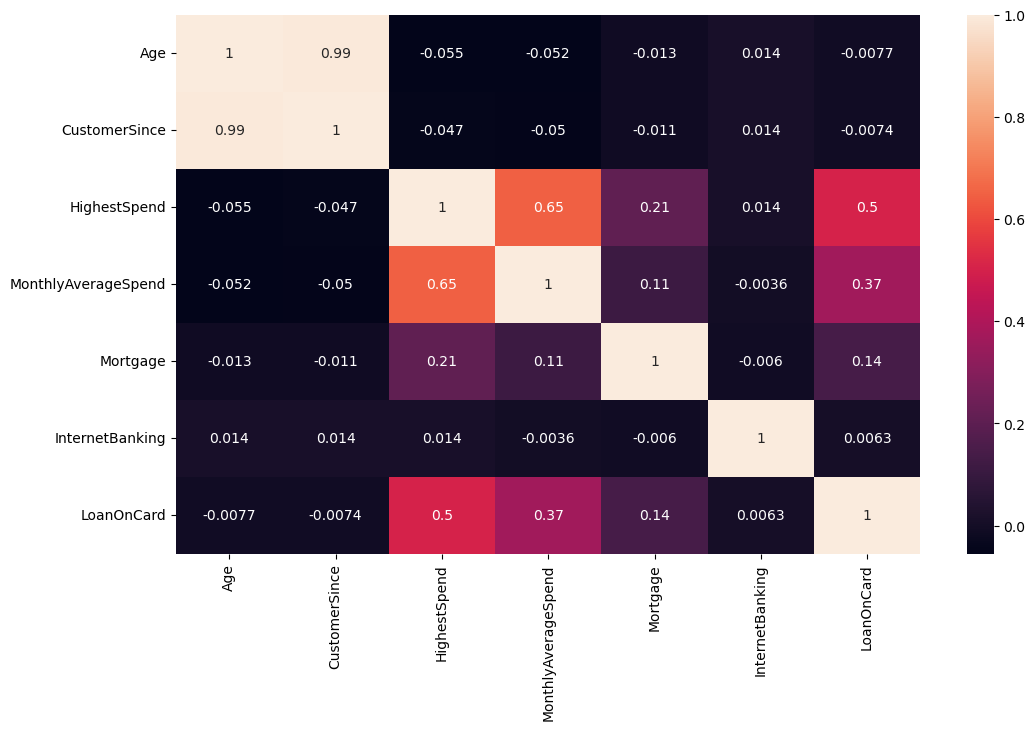

In [118]:
plt.figure(figsize=(12,7))
sns.heatmap(bank_data.corr(),annot= True);
plt.show()

###### We can't consider 'ID' and ' ZipCode' columns statistical descriptions as it has no values as numerical.

### Data Preparation and Model Building
#### Split the data into X and Y

In [ ]:
X= bank_data.iloc[:, :-1]
y= bank_data['LoanOnCard']


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(X_train, X_test, y_train, y_test)= train_test_split(X,y,random_state=1, test_size=0.25)

ss= StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 11)
(1250, 11)
(3750,)
(1250,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your data and target variables
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Create a model (e.g., Logistic Regression) and fit it to the scaled training data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# After fitting the model, you can transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Use the model to make predictions on the scaled test data
predictions = model.predict(X_test_scaled)


In [51]:
X_test_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [174]:
y_train.head()

3186    0.0
632     1.0
577     0.0
2406    0.0
4686    0.0
Name: LoanOnCard, dtype: float64

In [52]:
# Model building
# Logistic regression 
#import libraries

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

#fit the model for training data
lmodel1= LogisticRegression()
lmodel1= LogisticRegression().fit(X_train_scaled, y_train)
lmodel1

LogisticRegression()

In [59]:
#testing data

y_pred= lmodel1.predict(X_test_scaled)
y_pred

#accuracy score

print("Accuracy score=", lmodel1.score(X, y))
print("Classification_report=", classification_report(y_test, y_pred))
print("Confusion_matrix=", confusion_matrix(y_test, y_pred))


Accuracy score= 0.096
Classification_report=               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1121
         1.0       0.85      0.63      0.72       129

    accuracy                           0.95      1250
   macro avg       0.91      0.81      0.85      1250
weighted avg       0.95      0.95      0.95      1250

Confusion_matrix= [[1107   14]
 [  48   81]]


In [60]:
cm= pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

,0,1
0,1107,14
1,48,81


### Logistic model 1 (lmodel1) is showing 0.9498 of accuracy score.
#### 1104 true positives but only 77 true negatives.

In [61]:
#defining param_grid parameters
param_grid= [
    {'penalty': ['l1', 'l2', 'none','elasticnet'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'newton_cg', 'liblinear', 'sag', 'saga'],
    }
]

In [95]:
#hyper parameter tuning(hpt)
from sklearn.model_selection import GridSearchCV
grids = GridSearchCV(lmodel1, param_grid=param_grid,cv=3, verbose= True )
best_fit= grids.fit(X,y)
best_fit

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                          'solver': ['lbfgs', 'newton_cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [94]:
best_fit.best_estimator_

LogisticRegression(C=4.281332398719396, penalty='l1', solver='liblinear')

In [93]:
best_fit.score(X,y)

0.9518

In [187]:
#Model testing usig best parameters

logmodel= LogisticRegression(C=4.281332398719396, penalty='l1', solver='liblinear')
model= logmodel.fit(X_train, y_train)
model

LogisticRegression(C=4.281332398719396, penalty='l1', solver='liblinear')

In [96]:
y_pred1= model.predict(X_test)
print(y_pred)

NameError: name 'model' is not defined

In [ ]:
Accuracy= model.score(X,y)
Accuracy

#### Best Fit Model:
Best fit is obtaind after hyper parameters tuning.
It has improved the accuracy score of the model from 0.9498 to 0.9512

In [ ]:
cm1= confusion_matrix(y_pred1,y_test)
df= pd.DataFrame(cm)
df

In [ ]:
## Repeat the model after using Standard Scaler()

